# Use decision trees to prepare a model on fraud data 


**Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"**

## Import Necessary Libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [47]:
data = pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## EDA

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [49]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


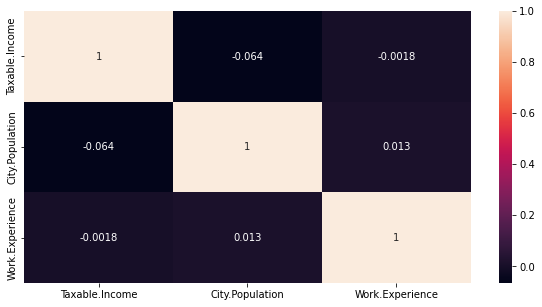

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [51]:
#Rename Columns

data.rename(columns = {'Marital.Status' : 'Marital_status', 'Taxable.Income': 'Income', 'City.Population': 'Population',
                    'Work.Experience': 'Work_exp'}, inplace= True)

In [52]:
#One Hot Encoded Data Frame

data1 = pd.get_dummies(data, columns=['Marital_status','Undergrad','Urban'], drop_first=True)
data1

,Income,Population,Work_exp,Marital_status_Married,Marital_status_Single,Undergrad_YES,Urban_YES
0,68833,50047,10,0,1,0,1
1,33700,134075,18,0,0,1,1
2,36925,160205,30,1,0,0,1
3,50190,193264,15,0,1,1,1
4,81002,27533,28,1,0,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,0,0,1,1
596,69967,55369,2,0,0,1,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,0,1,0


In [53]:
# Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

data1['Status'] = data1['Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')
data1 = pd.get_dummies(data1, columns=['Status'], drop_first=True)
data1

,Income,Population,Work_exp,Marital_status_Married,Marital_status_Single,Undergrad_YES,Urban_YES,Status_Risky
0,68833,50047,10,0,1,0,1,0
1,33700,134075,18,0,0,1,1,0
2,36925,160205,30,1,0,0,1,0
3,50190,193264,15,0,1,1,1,0
4,81002,27533,28,1,0,0,0,0
...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,0,1,1,0
596,69967,55369,2,0,0,1,1,0
597,47334,154058,0,0,0,0,1,0
598,98592,180083,17,1,0,1,0,0


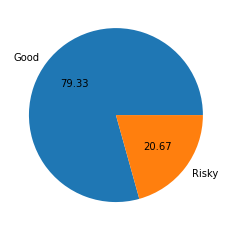

In [54]:
plt.pie(x=data1['Status_Risky'].value_counts() , autopct='%0.2f' , data=data1, labels=['Good', 'Risky'])
plt.show()

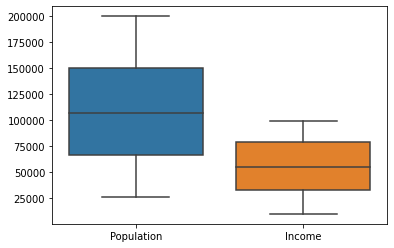

In [55]:
sns.boxplot(data=data1[['Population', 'Income']])
plt.show()

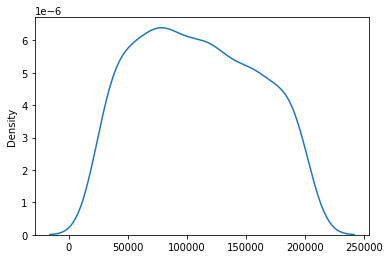

In [56]:
sns.distplot(x=data1['Population'], hist=False)
plt.show()

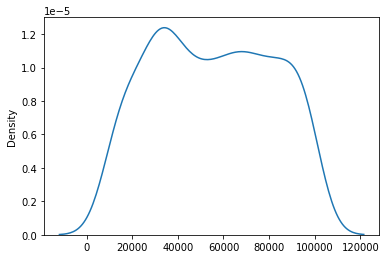

In [57]:
sns.distplot(x=data1['Income'], hist=False)
plt.show()

## Splitting dataset

In [58]:
X = data1.iloc[:, 1:-1]
y = data1.iloc[:, -1]

## Feature Scaling

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaled_X = MinMaxScaler()
X = scaled_X.fit_transform(X)
X

array([[0.13947207, 0.33333333, 0.        , 1.        , 0.        ,
        1.        ],
       [0.62239438, 0.6       , 0.        , 0.        , 1.        ,
        1.        ],
       [0.77256766, 1.        , 1.        , 0.        , 0.        ,
        1.        ],
       ...,
       [0.73723987, 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.88680969, 0.56666667, 1.        , 0.        , 1.        ,
        0.        ],
       [0.76068253, 0.53333333, 0.        , 0.        , 0.        ,
        0.        ]])

## Model Building 

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34, random_state=12, stratify=y)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((395, 6), (205, 6), (395,), (205,))

## Model Training & Evaluation 

In [63]:
dt_model = DecisionTreeClassifier(random_state=12, class_weight={0:1, 1:4 })

In [64]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 4}, random_state=12)

In [65]:
y_pred_train = dt_model.predict(X_train)

In [66]:
accuracy_score(y_train, y_pred_train)

1.0

In [67]:
confusion_matrix(y_train, y_pred_train)

array([[313,   0],
       [  0,  82]], dtype=int64)

## Model Testing & Evaluation 

In [68]:
y_pred_test = dt_model.predict(X_test)

In [69]:
y_pred_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [70]:
accuracy_score(y_test, y_pred_test).round(3)

0.673

In [71]:
confusion_matrix(y_test, y_pred_test)

array([[133,  30],
       [ 37,   5]], dtype=int64)

In [72]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       163
           1       0.14      0.12      0.13        42

    accuracy                           0.67       205
   macro avg       0.46      0.47      0.46       205
weighted avg       0.65      0.67      0.66       205



### Above model seems to be good, but I there's an Overfitting problem with train & test data. Let's try out using entropy in decision tree criteria

## Model Training & Evaluation 

In [73]:
dt_model2 = DecisionTreeClassifier(criterion='entropy', random_state=12, class_weight={0:1, 1:4 })

In [74]:
dt_model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 4}, criterion='entropy',
                       random_state=12)

In [75]:
y_pred_train = dt_model2.predict(X_train)

In [76]:
accuracy_score(y_train, y_pred_train)

1.0

In [77]:
confusion_matrix(y_train, y_pred_train)

array([[313,   0],
       [  0,  82]], dtype=int64)

## Model Testing & Evaluation 

In [78]:
y_pred_test = dt_model2.predict(X_test)

In [79]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0], dtype=uint8)

In [80]:
accuracy_score(y_test, y_pred_test).round(3)

0.683

In [81]:
confusion_matrix(y_test, y_pred_test)

array([[137,  26],
       [ 39,   3]], dtype=int64)

In [82]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       163
           1       0.10      0.07      0.08        42

    accuracy                           0.68       205
   macro avg       0.44      0.46      0.45       205
weighted avg       0.64      0.68      0.66       205



### The accuracy is not improved with entropy. Hence, we will tweak the hyper-parameters to recheck the accuracy of our above two model.

### Lets try out with Grid Search CV to check at what hyper parameters, our model is performing the best.

#### Train Data

In [83]:
dt_model3 = DecisionTreeClassifier(random_state=12, class_weight={0:1, 1:4 })
criterion = ['entropy', 'gini']
max_depth = range(1,10)
params = [{'criterion': criterion , 'max_depth':max_depth}]
grid = GridSearchCV(estimator = dt_model3, param_grid = params, cv = 5)
grid.fit(X_train, y_train)

print(grid.best_params_)
print("Accuracy_score:",grid.best_score_.round(3))

{'criterion': 'gini', 'max_depth': 9}
Accuracy_score: 0.603


#### Test data 

In [84]:
dt_model3 = DecisionTreeClassifier(random_state=12, max_depth = 9, criterion = 'gini', )
dt_model3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=12)

In [85]:
y_pred = dt_model3.predict(X_test)

In [86]:
accuracy_score(y_test, y_pred).round(4)

0.678

In [87]:
confusion_matrix(y_test, y_pred)

array([[131,  32],
       [ 34,   8]], dtype=int64)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       163
           1       0.20      0.19      0.20        42

    accuracy                           0.68       205
   macro avg       0.50      0.50      0.50       205
weighted avg       0.67      0.68      0.68       205



### As we can see that for risky class model is not able to predict it. The recall & precision for risky is bad due to imbalance data.

### Handling imbalanced trained data using SMOTE

In [89]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 12)
X_res, y_res = sm.fit_resample(X, y)

In [90]:
print('X_res after resampling shape : ' , X_res.shape)
print('y_res after resampling shape : ' , y_res.shape)
print(y_res.value_counts())

X_res after resampling shape :  (952, 6)
y_res after resampling shape :  (952,)
0    476
1    476
Name: Status_Risky, dtype: int64


## Building Decision Tree Classifier Model with balanced train data

In [91]:
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size=0.25, random_state=12, stratify=y_res)

In [92]:
dt_model4 = DecisionTreeClassifier(random_state=12)

criterion = ['entropy', 'gini']
max_depth = range(1,10)
params = [{'criterion': criterion , 'max_depth':max_depth}]

grid = GridSearchCV(estimator=dt_model4, param_grid=params, cv = 10)

grid.fit(X_res_train, y_res_train)

print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 9}
0.6273865414710486


## Model Building

In [93]:
dt_model5 = DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=12, class_weight={0:1, 1:4 })
dt_model5.fit(X_res_train, y_res_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 4}, max_depth=9, random_state=12)

##  Model Training & Evaluation 

In [94]:
y_pred_train = dt_model5.predict(X_res_train)

In [95]:
accuracy_score(y_res_train, y_pred_train)

0.7605042016806722

In [96]:
confusion_matrix(y_res_train, y_pred_train)

array([[188, 169],
       [  2, 355]], dtype=int64)

In [97]:
print(classification_report(y_res_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.53      0.69       357
           1       0.68      0.99      0.81       357

    accuracy                           0.76       714
   macro avg       0.83      0.76      0.75       714
weighted avg       0.83      0.76      0.75       714



## Model Testing & Evaluation with test data

In [98]:
y_pred_test = dt_model5.predict(X_res_test)

In [99]:
accuracy_score(y_res_test, y_pred_test)

0.6092436974789915

In [100]:
confusion_matrix(y_res_test, y_pred_test)

array([[ 45,  74],
       [ 19, 100]], dtype=int64)

In [101]:
print(classification_report(y_res_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.38      0.49       119
           1       0.57      0.84      0.68       119

    accuracy                           0.61       238
   macro avg       0.64      0.61      0.59       238
weighted avg       0.64      0.61      0.59       238



## Boosting Techniques

In [102]:
ad = AdaBoostClassifier(random_state=12, base_estimator=dt_model5)
ad.fit(X_res_train, y_res_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 1,
                                                                       1: 4},
                                                         max_depth=9,
                                                         random_state=12),
                   random_state=12)

In [103]:
y_pred_test= ad.predict(X_res_test)

In [104]:
accuracy_score(y_res_test, y_pred_test)

0.6848739495798319

In [105]:
confusion_matrix(y_res_test, y_pred_test)

array([[87, 32],
       [43, 76]], dtype=int64)

In [106]:
print(classification_report(y_res_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       119
           1       0.70      0.64      0.67       119

    accuracy                           0.68       238
   macro avg       0.69      0.68      0.68       238
weighted avg       0.69      0.68      0.68       238



### Conclusion: 
**This final model(built after handling imbalanced data) is better than the first models(built with imbalanced data) because it classifies better and also the recall value & precision values of risky (class 1) is able to predict better. So in this case, SMOTE is giving a good accuracy and recall, so we can use the model5 with adaboost technique which improved accuracy to 68% and correctly deals with False Negatives which is risky class and we want to minimise it.
Hence, model5 with adaboost is a good model.**

### =================================================================== 